In [1]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # to adjust the configuration of plot

pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv(r'C:\Users\krist\OneDrive\Asztali gép\github_projects\python3\movies.csv')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
#let's see if there's any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [10]:
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

<AxesSubplot:>

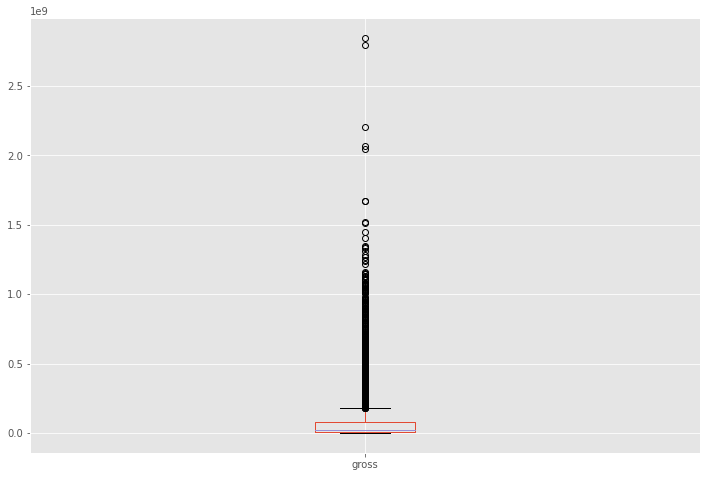

In [20]:
# any outliers?

df.boxplot(column=['gross'])

In [11]:
# extract year from 'released' column

df['year_fix'] = df['released'].astype('str').str.extract('(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [12]:
#sort data based on gross 
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


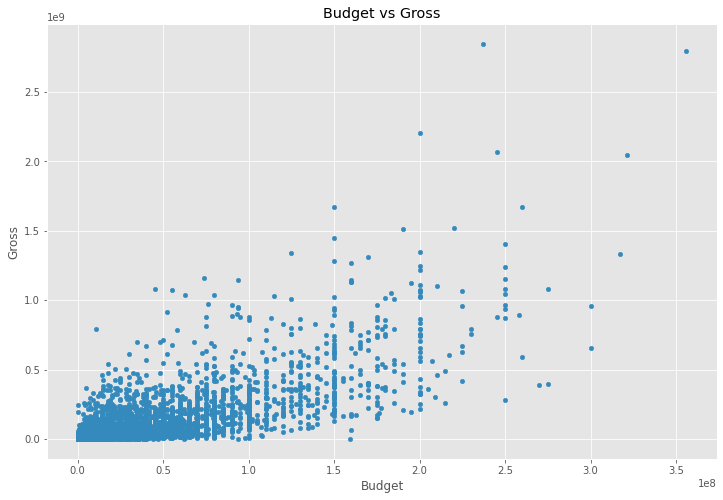

In [13]:
#  scatter chart: 'budget' vs 'gross'
df.plot.scatter(x='budget', y='gross')

# title and labels
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

# Show chart
plt.show()

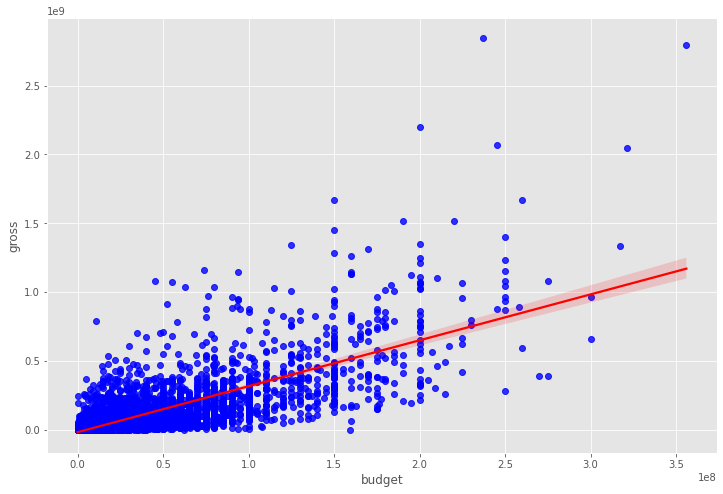

In [14]:
# budget vs gross using seaborn with a line

sns.regplot(x='budget', y = 'gross', data = df, scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.show()

In [17]:
#correlation
df.corr(method='pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


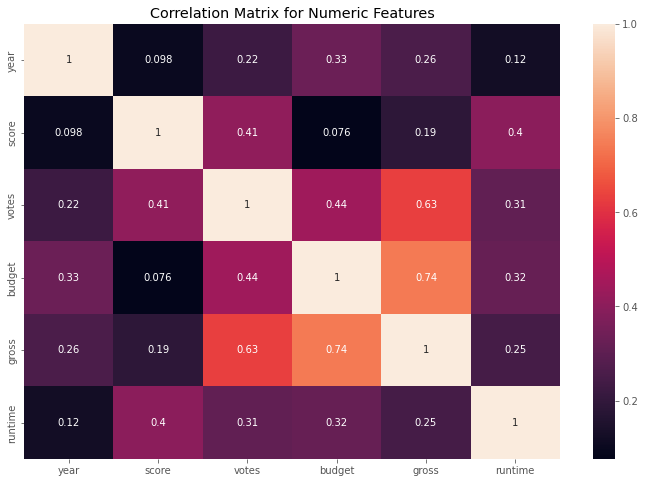

In [18]:
#correlation visualized 

sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [21]:
# numerize all non numerical values in dataframe to gain this insight

df_numerized = df.copy()


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,40
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,40
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,40
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,40


In [22]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_fix
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027606


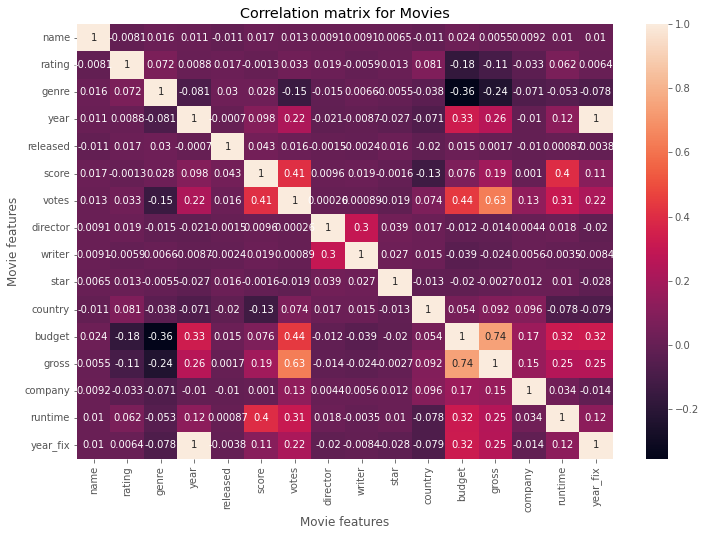

In [23]:
# correlation in chart

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

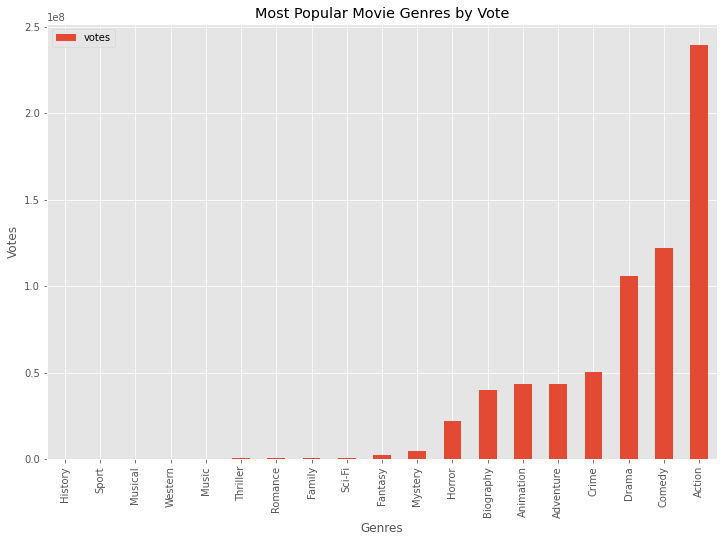

In [25]:
# find most popular genre by vote

ax = df[['genre','votes']].groupby(['genre']).sum().sort_values(by=['votes'], ascending=True)\
.plot(kind='bar', title = 'Most Popular Movie Genres by Vote')

ax.set_xlabel('Genres') #labeling the x axis
ax.set_ylabel('Votes')

plt.show()

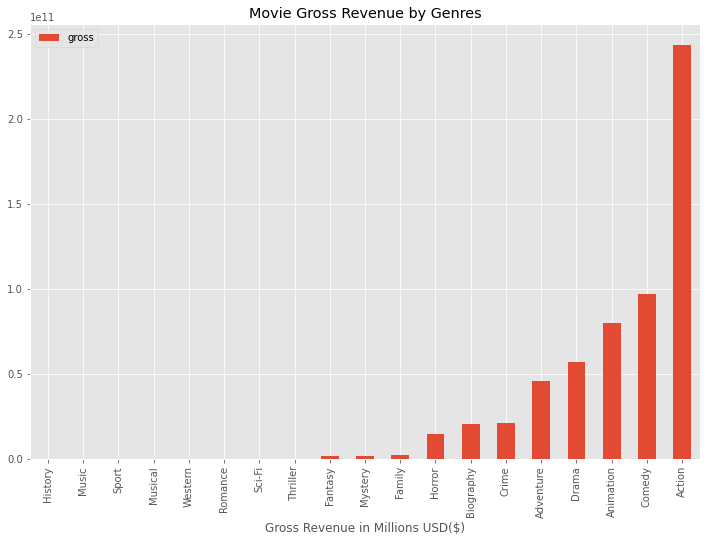

In [26]:
ax = df[['genre','gross']].groupby(['genre']).sum().sort_values(by=['gross'], ascending=True)\
.plot(kind='bar', title = 'Movie Gross Revenue by Genres')

ax.set_xlabel('Gross Revenue in Millions USD($)')
plt.show()

In [27]:
from prettytable import PrettyTable

# Group data by genre and compute the mean score
df_genre_score_mean = df[['genre','score']].groupby(['genre']).mean().sort_values(by=['score'], ascending=False)

# Create a table with two columns
table = PrettyTable()
table.field_names = ["Genre", "Average Score"]

# Iterate over the data and add rows to the table
for index, row in df_genre_score_mean.iterrows():
    table.add_row([index, round(row['score'], 2)])

# Set table properties
table.align["Genre"] = "l"  # left align the genre column
table.align["Average Score"] = "r"  # right align the score column
table.padding_width = 1  # add some padding to the cells

# Print the table
print(table)

+-----------+---------------+
| Genre     | Average Score |
+-----------+---------------+
| History   |           8.3 |
| Musical   |          8.05 |
| Music     |           7.2 |
| Biography |          7.03 |
| Animation |          6.77 |
| Drama     |          6.69 |
| Crime     |          6.67 |
| Mystery   |          6.67 |
| Romance   |          6.41 |
| Family    |          6.36 |
| Adventure |          6.29 |
| Sci-Fi    |          6.21 |
| Action    |           6.2 |
| Comedy    |          6.19 |
| Fantasy   |          6.01 |
| Thriller  |          5.91 |
| Sport     |           5.9 |
| Horror    |          5.75 |
| Western   |          5.67 |
+-----------+---------------+


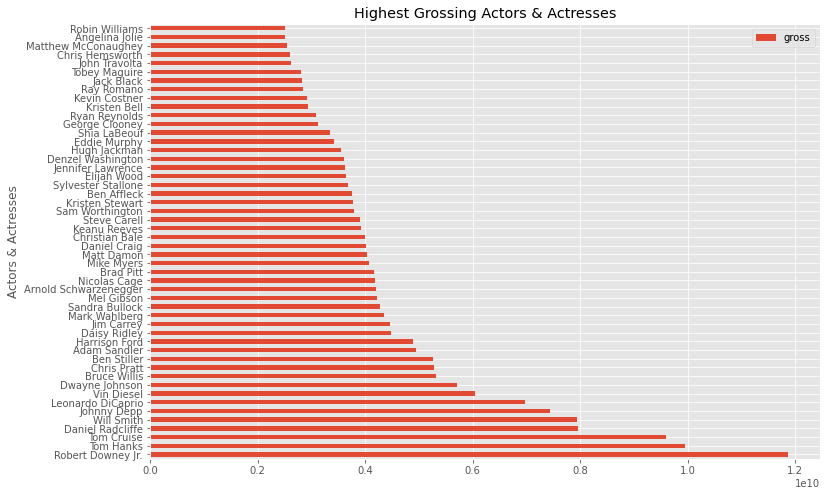

In [28]:
ax = df[['star','gross']].groupby('star').sum().sort_values(by=['gross'], ascending=False).head(50)\
.plot(kind='barh', title='Highest Grossing Actors & Actresses')
ax.set_ylabel('Actors & Actresses')
plt.show()

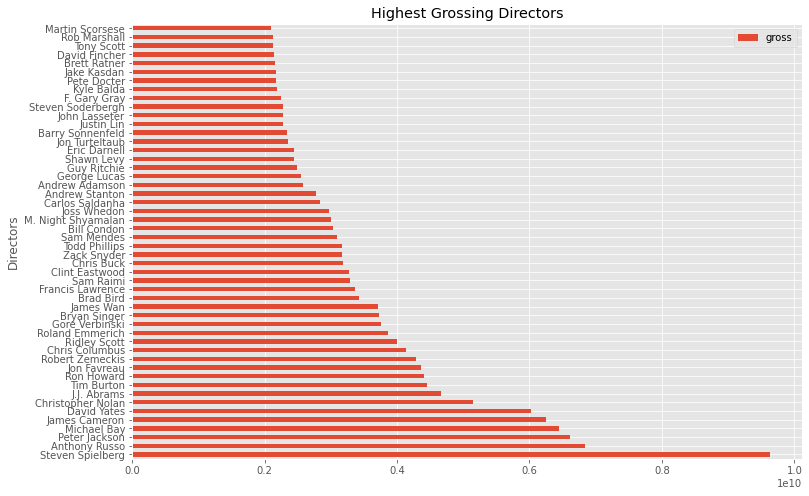

In [29]:
ax = df[['director','gross']].groupby('director')\
.sum().sort_values(by=['gross'], ascending=False).head(50).plot(kind='barh', title='Highest Grossing Directors')
ax.set_ylabel('Directors')
plt.show()